In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
features = ['Age', 'EstimatedSalary']
target = ['Purchased']

In [4]:
X = dataset[features].values.astype('float')
Y = dataset[target].values.astype('float')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[61,  7],
       [ 3, 29]])

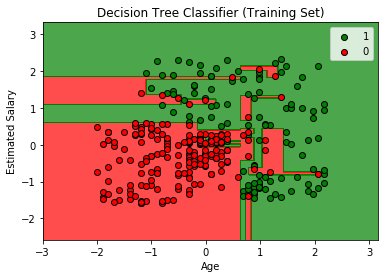

In [13]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
trues = (Y_set == 1).reshape(Y_set.shape[0])
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
                     np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.7, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[trues,0], X_set[trues,1], c='g', edgecolor='k', label='1')
plt.scatter(X_set[~trues,0], X_set[~trues,1], c='r', edgecolor='k', label='0')
plt.title('Decision Tree Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

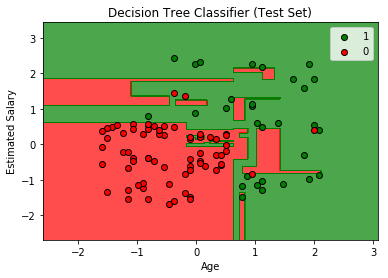

In [12]:
X_set, Y_set = X_test, Y_test
trues = (Y_set == 1).reshape(Y_set.shape[0])
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
                     np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.7, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[trues,0], X_set[trues,1], c='g', edgecolor='k', label='1')
plt.scatter(X_set[~trues,0], X_set[~trues,1], c='r', edgecolor='k', label='0')
plt.title('Decision Tree Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()